# CMEMS HR-OC

This notebook demonstrates the use of xcube’s CMEMS data store to fetch and plot chlorophyll-A concentration from the High-Resolution Ocean Colour (HR-OC) Consortium’s [L4 Baltic Sea product](https://data.marine.copernicus.eu/product/OCEANCOLOUR_BAL_BGC_HR_L4_NRT_009_208/description).

## Import libraries

In [1]:
import os
import getpass
from xcube.core.store import new_data_store

## Set credentials, if necessary

If you don’t have a CMEMS account yet, you can sign up free of charge at <https://data.marine.copernicus.eu/register>.

If possible, you should set the environment variables `CMEMS_USERNAME` and `CMEMS_PASSWORD` before running this notebook. If you can’t do this, uncomment the cell below and enter your CMEMS user name to set the variables when the notebook runs.

In [2]:
# cmems_username = 'Replace this text with your cmems user name.'

# os.environ.update(dict(
#     CMEMS_USERNAME=cmems_username,
#     CMEMS_PASSWORD=getpass.getpass('Enter CMEMS password:')
# ))

# # ⬇ A password prompt will appear below when you execute this cell. ⬇

Create an xcube CMEMS data store.

In [3]:
cmems_store = new_data_store('cmems')

Open the HR-OC Baltic dataset.

In [4]:
dataset = cmems_store.open_data('cmems_obs_oc_bal_bgc_tur-spm-chl_nrt_l4-hr-mosaic_P1D-m')

Select the dates of interest – these are dates on which HR-OC data is available for the studied area.

In [5]:
dates_of_interest = [
    '2022-06-28', '2022-07-03', '2022-07-06', '2022-07-08',
    '2022-07-11', '2022-07-13', '2022-07-16', '2022-07-21',
    '2022-07-26', '2022-07-28', '2022-07-31', '2022-08-02',
]

Produce plots of chlorophyll-A concentration for the specified dates over a small area around the southern Danish island of Ærø.

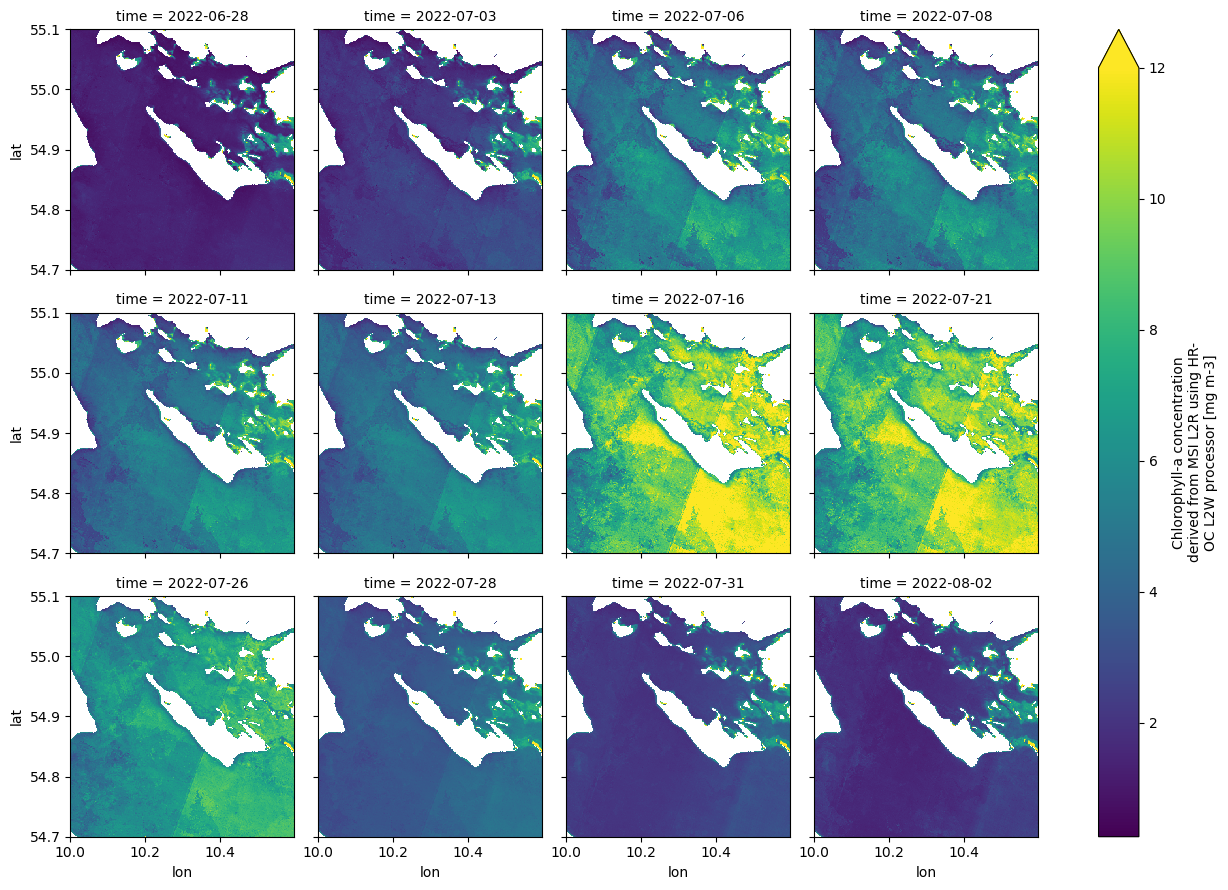

In [6]:
dataset.CHL\
  .sel(time=dates_of_interest, lat=slice(55.1, 54.7), lon=slice(10.0, 10.6))\
  .plot.imshow(col='time', col_wrap=4, vmax=12)

Now make a line plot of chlorophyll-A concentration at the same time-points at a specific location off the southern coast of Ærø.

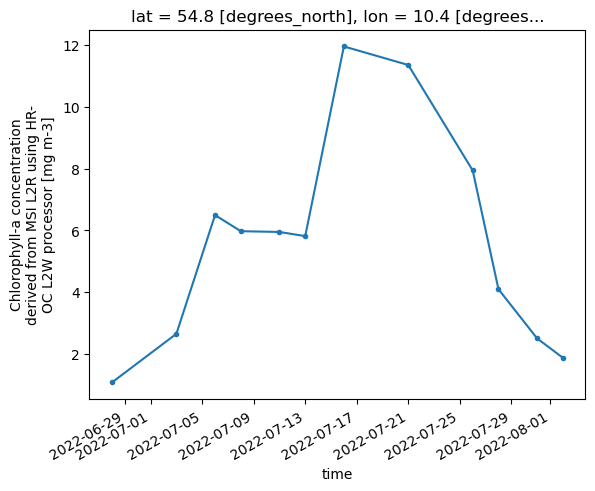

In [7]:
dataset.CHL\
  .sel(time=dates_of_interest, lat=54.8, lon=10.4, method='nearest')\
  .plot.line('.-')

## Going further

How to find out which variables are in a dataset, which datasets are in a store, and which other xcube data stores are available? Look at the [xcube CMEMS example notebook](https://github.com/dcs4cop/xcube/blob/master/examples/notebooks/datastores/7_cmems_data_store.ipynb) and the [xcube data stores getting started notebook](https://github.com/dcs4cop/xcube/blob/master/examples/notebooks/datastores/1_getting_started.ipynb) for more information. The main xcube documentation is at <https://xcube.readthedocs.io>.